## Figure 16 (Journal of Climate submission; Molina et al.)

Fig. 16. Pacific meridional streamfunction (Sv; 10$^{6}$ m$^{3}$s$^{-1}$) to a depth of approximately 450 meters for the CESM1 control (a) and anomalies of the sensitivity experiments computed from the CESM1 control climatology (b-f) during the same years as Fig. 2. The Northern Hemisphere STC flows from south-to-north in the upper vertical levels and north-to-south in deeper levels with red colors indicating a clockwise circulation (color bar at lower left), whereas the Southern Hemisphere STC flows from north-to-south in upper levels and south-to-north in deeper levels with blue colors indicating a counter-clockwise circulation (color bar at lower left). Positive anomaly values (blue dashed lines, color bar at lower right) of the Pacific meridional streamfunction within the Northern Hemisphere show northward movement across the shallower branch of the STC and negative anomaly values (black dashed lines, color bar at lower right) within the Southern Hemisphere show southward movement across the shallower branch of the STC. Schematic illustration of circulation flow is contained in the top-left plot (a) using arrows.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from climatico import enso
import cftime
from datetime import timedelta
from matplotlib.colors import LinearSegmentedColormap, ColorConverter
from matplotlib.lines import Line2D

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for
TVTS_g02sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.*.mon.nc'
TVTS_g04sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.*.mon.nc'
TVTS_p02sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.*.mon.nc'
TVTS_p04sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.*.mon.nc'
TVTS_psalt = 'TVTS_b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.*.mon.nc'
TVTS_cntrl = 'TVTS_b.e11.B1850C5CN.f09_g16.005.pop.h.*.mon.nc'

In [4]:
def get_var(ds):
    return ds['pmsf'].to_dataset(name='pmsf')

In [5]:
ds_g02sv = xr.open_mfdataset(f'{directory_data}{TVTS_g02sv}', preprocess=get_var, combine='by_coords')
ds_g04sv = xr.open_mfdataset(f'{directory_data}{TVTS_g04sv}', preprocess=get_var, combine='by_coords')
ds_p02sv = xr.open_mfdataset(f'{directory_data}{TVTS_p02sv}', preprocess=get_var, combine='by_coords')
ds_p04sv = xr.open_mfdataset(f'{directory_data}{TVTS_p04sv}', preprocess=get_var, combine='by_coords')
ds_psalt = xr.open_mfdataset(f'{directory_data}{TVTS_psalt}', preprocess=get_var, combine='by_coords')
ds_cntrl = xr.open_mfdataset(f'{directory_data}{TVTS_cntrl}', preprocess=get_var, combine='by_coords')

In [6]:
# coords
levs = ds_cntrl.sel(lat=slice(-35,35), lev=slice(0,500)).coords['lev']
lats = ds_cntrl.sel(lat=slice(-35,35), lev=slice(0,500)).coords['lat']

In [7]:
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-35,35), lev=slice(0,500))
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-35,35), lev=slice(0,500))
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-35,35), lev=slice(0,500))
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-35,35), lev=slice(0,500))
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17)).sel(lat=slice(-35,35), lev=slice(0,500))
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17)).sel(lat=slice(-35,35), lev=slice(0,500))

In [8]:
ds_g02sv = ds_g02sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_g04sv = ds_g04sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_p02sv = ds_p02sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_p04sv = ds_p04sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_psalt = ds_psalt['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(101, 1, 1),cftime.DatetimeNoLeap(251, 1, 1))).mean('time',skipna=True)
ds_cntrl = ds_cntrl['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1),cftime.DatetimeNoLeap(1600, 1, 1))).mean('time',skipna=True)

In [9]:
def make_colormap(colors):
    
    z  = np.array(sorted(colors.keys()))
    n  = len(z)
    z1 = min(z)
    zn = max(z)
    x0 = (z - z1) / (zn - z1)
    
    CC = ColorConverter()
    R = []
    G = []
    B = []
    for i in range(n):
        Ci = colors[z[i]]
        if type(Ci) == str:
            RGB = CC.to_rgb(Ci)
        else:
            RGB = Ci
        R.append(RGB[0])
        G.append(RGB[1])
        B.append(RGB[2])
    
    cmap_dict = {}
    cmap_dict['red']   = [(x0[i],R[i],R[i]) for i in range(len(R))]
    cmap_dict['green'] = [(x0[i],G[i],G[i]) for i in range(len(G))]
    cmap_dict['blue']  = [(x0[i],B[i],B[i]) for i in range(len(B))]
    mymap = LinearSegmentedColormap('mymap',cmap_dict)
    
    return mymap

In [10]:
cbar_color = ({ 0.:'k',
                0.079:'k',
               
                0.08:'grey',
                0.159:'grey',
               
                0.16:'darkgrey',
                0.2422:'darkgrey',
               
                0.2423:'silver',
                0.329:'silver',
               
                0.33:'gainsboro',
                0.409:'gainsboro',
               
                0.41:'whitesmoke',
                0.49:'whitesmoke',
               
                0.5:'lightcyan',
                0.5749:'lightcyan',
               
                0.575:'lightskyblue',
                0.65:'lightskyblue',
               
                0.66:'deepskyblue',
                0.73949:'deepskyblue',
               
                0.7395:'dodgerblue',
                0.819:'dodgerblue',
               
                0.820:'b',
                0.909:'b',
               
                0.91:'navy',
                1.0:'navy'})

cbar_color = make_colormap(cbar_color)

In [11]:
cs2 = plt.contourf(lats, levs, ds_psalt.values - ds_cntrl.values,
                   levels=[-12.5,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.5],
                   cmap=cbar_color, shading='auto', extend='both')
plt.close()

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'shading'
  This is separate from the ipykernel package so we can avoid doing imports until


/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/m

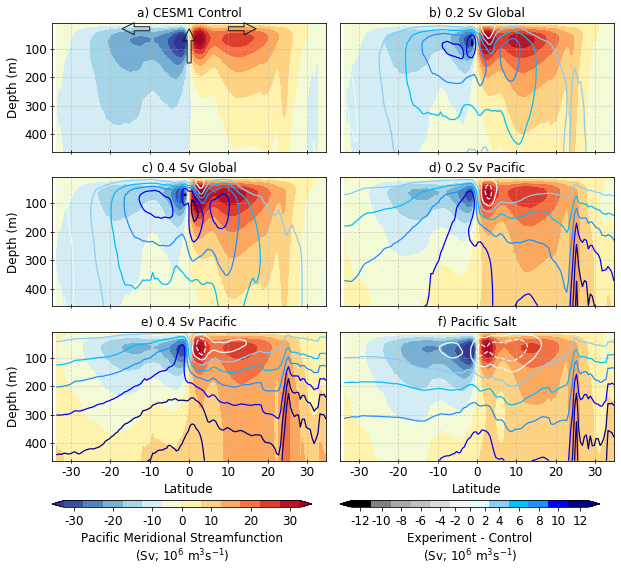

In [12]:
# --------------

fig = plt.figure(figsize=(8,6.5))

# --------------

ax0 = plt.axes([0., 0.66, 0.475, 0.275])

ax0.set_title('a) CESM1 Control', fontsize=12)

cs = ax0.contourf(lats, levs, ds_cntrl.values, levels=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], 
                  cmap='RdYlBu_r', extend='both')

ax0.set_yticks([0,100,200,300,400])
ax0.set_yticklabels([0,100,200,300,400], fontsize=12)
ax0.set_xticks([-30,-20,-10,0,10,20,30])
ax0.set_xticklabels([-30,-20,-10,0,10,20,30], fontsize=12)

ax0.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax0.grid(alpha=0.5, ls='--')
ax0.set_ylabel('Depth (m)', fontsize=12)

ax0.annotate('', xy=(0., 30), xytext=(0., 150), zorder=100, xycoords='data', size=20,
             arrowprops=dict(facecolor='none', ec = '0.1'))

ax0.annotate('', xy=(-17, 30), xytext=(-10, 30), zorder=100, xycoords='data', size=20, 
             arrowprops=dict(facecolor='none', ec = '0.1'))

ax0.annotate('', xy=(17, 30), xytext=(10, 30), zorder=100, xycoords='data', size=20, 
             arrowprops=dict(facecolor='none', ec = '0.1'))

# --------------

ax1 = plt.axes([0.5, 0.66, 0.475, 0.275])

ax1.set_title('b) 0.2 Sv Global', fontsize=12)

ax1.contourf(lats, levs, ds_g02sv.values, levels=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], 
             cmap='RdYlBu_r', extend='both')

ax1.contour(lats, levs, ds_g02sv.values - ds_cntrl.values, 
            linewidths=1.25, 
            linestyles=np.where(
                np.array([-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.]) >= 0, "-", "--"),
            levels=[-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.],  
            cmap=cbar_color, extend='both')

ax1.set_yticks([0,100,200,300,400])
ax1.set_yticklabels([0,100,200,300,400], fontsize=12)
ax1.set_xticks([-30,-20,-10,0,10,20,30])
ax1.set_xticklabels([-30,-20,-10,0,10,20,30], fontsize=12)

ax1.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax1.grid(alpha=0.5, ls='--')

# --------------

ax2 = plt.axes([0., 0.33, 0.475, 0.275])

ax2.set_title('c) 0.4 Sv Global', fontsize=12)

cs1 = ax2.contourf(lats, levs, ds_g04sv.values, levels=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], 
                   cmap='RdYlBu_r', extend='both')

ax2.contour(lats, levs, ds_g04sv.values - ds_cntrl.values, 
            linewidths=1.25, 
            linestyles=np.where(
                np.array([-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.]) >= 0, "-", "--"),
            levels=[-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.],  
            cmap=cbar_color, extend='both')

ax2.set_yticks([0,100,200,300,400])
ax2.set_yticklabels([0,100,200,300,400], fontsize=12)
ax2.set_xticks([-30,-20,-10,0,10,20,30])
ax2.set_xticklabels([-30,-20,-10,0,10,20,30], fontsize=12)

ax2.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax2.grid(alpha=0.5, ls='--')
ax2.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax3 = plt.axes([0.5, 0.33, 0.475, 0.275])

ax3.set_title('d) 0.2 Sv Pacific', fontsize=12)

ax3.contourf(lats, levs, ds_p02sv.values, levels=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], 
             cmap='RdYlBu_r', extend='both')

ax3.contour(lats, levs, ds_p02sv.values - ds_cntrl.values, 
            linewidths=1.25, 
            linestyles=np.where(
                np.array([-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.]) >= 0, "-", "--"),
            levels=[-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.],  
            cmap=cbar_color, extend='both')

ax3.set_yticks([0,100,200,300,400])
ax3.set_yticklabels([0,100,200,300,400], fontsize=12)
ax3.set_xticks([-30,-20,-10,0,10,20,30])
ax3.set_xticklabels([-30,-20,-10,0,10,20,30], fontsize=12)

ax3.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax3.grid(alpha=0.5, ls='--')

# --------------

ax00 = plt.axes([0., 0., 0.475, 0.275])

ax00.set_title('e) 0.4 Sv Pacific', fontsize=12)

ax00.contourf(lats, levs, ds_p04sv.values, levels=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], 
              cmap='RdYlBu_r', extend='both')

ax00.contour(lats, levs, ds_p04sv.values - ds_cntrl.values, 
             linewidths=1.25, 
             linestyles=np.where(
                 np.array([-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.]) >= 0, "-", "--"),
             levels=[-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.],   
             cmap=cbar_color, extend='both')

ax00.set_yticks([0,100,200,300,400])
ax00.set_yticklabels([0,100,200,300,400], fontsize=12)
ax00.set_xticks([-30,-20,-10,0,10,20,30])
ax00.set_xticklabels([-30,-20,-10,0,10,20,30], fontsize=12)

ax00.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax00.grid(alpha=0.5, ls='--')
ax00.set_ylabel('Depth (m)', fontsize=12)
ax00.set_xlabel(u'Latitude', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0., 0.475, 0.275])

ax4.set_title('f) Pacific Salt', fontsize=12)

ax4.contourf(lats, levs, ds_psalt.values, levels=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], 
             cmap='RdYlBu_r', extend='both')

ax4.contour(lats, levs, ds_psalt.values - ds_cntrl.values, 
            linewidths=1.25, 
            linestyles=np.where(
                np.array([-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.]) >= 0, "-", "--"),
            levels=[-12.,-10.,-8.,-6.,-4.,-2.,0.,2.,4.,6.,8.,10.,12.],  
            cmap=cbar_color, extend='both')

ax4.set_yticks([0,100,200,300,400])
ax4.set_yticklabels([0,100,200,300,400], fontsize=12)
ax4.set_xticks([-30,-20,-10,0,10,20,30])
ax4.set_xticklabels([-30,-20,-10,0,10,20,30], fontsize=12)

ax4.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax4.grid(alpha=0.5, ls='--')
ax4.set_xlabel(u'Latitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0., -0.1, 0.45, 0.015])
ticks_1 = [-30+2.5,-20+2.5,-10+2.5,0,10-2.5,20-2.5,30-2.5]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Pacific Meridional Streamfunction\n(Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=12)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_xticklabels([-30,-20,-10,0,10,20,30])

cbar_ax = fig.add_axes([0.5, -0.1, 0.45, 0.015])
ticks_1 = [-11.5,-9.,-7.,-5.,-3.,-1.5,0.,1.5,3.,5.,7.,9.,11.5]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Experiment - Control\n(Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=12)
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_xticklabels([-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12])

# --------------

plt.savefig(f'{directory_figs}amocenso_fig16.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig16.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------